# Logistic Regression with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ml_utils import ml_lib
from ml_utils import vis_lib

## Logistic Regression

In [3]:
# Load the dataset
data = np.loadtxt('../data/data3.txt', delimiter=',')

In [4]:
# Select X and Y
X = np.array(data[:, :-1])
y = np.array(data[:, -1:])

# Add intercept column
X = np.append(np.ones((y.size, 1)), X, axis=1)

# Thetas initialization
theta = np.zeros((X.shape[1], 1))

Let's visualize the data :

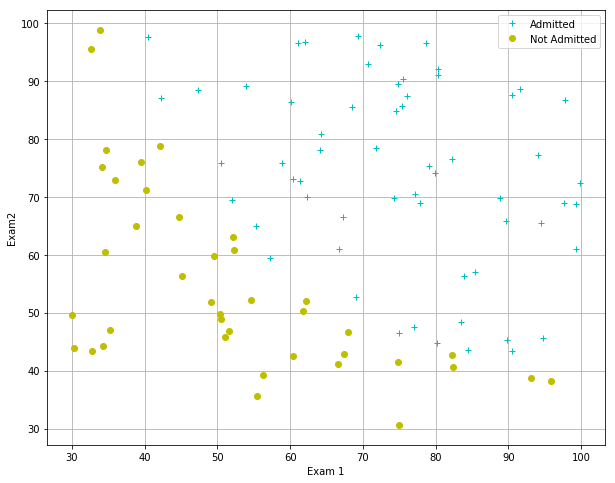

In [5]:
adm = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
nadm = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
vis_lib.plot2Class(adm, nadm, 'Admitted', 'Not Admitted', 'Exam 1', 'Exam2')

In [6]:
print('Cost at initial theta (zeros) :{}.'.format(ml_lib.logLossCost(X, y, theta)))

Cost at initial theta (zeros) :[0.69314718].


In [7]:
[theta, J_history] = ml_lib.logisticRegressionGradientDescent(X, y, theta, 0.001, 400000);

In [8]:
print('Theta computed from gradient descent : {}, {}, {}.'.format(theta[0][0], theta[1][0], theta[2][0]))

Theta computed from gradient descent : -10.63276758010003, 0.09045576450324251, 0.08425697183190727.


In [9]:
print('Cost after gradient descent : {}.'.format(ml_lib.logLossCost(X, y, theta)))

Cost after gradient descent : [0.26463496].


In [10]:
predictions = ml_lib.predictLogisticRegression(X, theta)
print('Train Accuracy with gradient descent: {}%.'.format((predictions == y).mean()*100))

Train Accuracy with gradient descent: 91.0%.


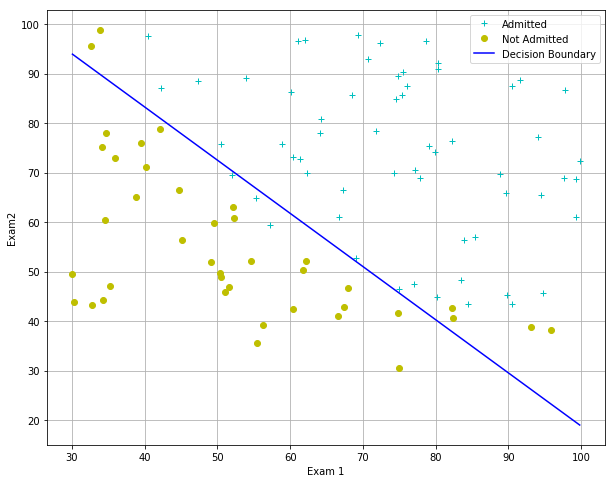

In [11]:
vis_lib.plot2Class(adm, nadm, 'Admitted', 'Not Admitted', 'Exam 1', 'Exam2')
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend();

In [12]:
predict1 = np.array([1, 45, 85]).dot(theta)
print('For a student with scores 45 and 85, we predict an admission probability of {}'.format(predict1[0]))

For a student with scores 45 and 85, we predict an admission probability of 0.5995844282580016


## Logistic Regression with map features and regularization

In [13]:
# Load the dataset
data = np.loadtxt('../data/data4.txt', delimiter=',')

In [14]:
# Select X and Y
X = np.array(data[:, :-1])
y = np.array(data[:, -1:])

# Map the features into all polynomial terms of x& and x2 up to the sixth power
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
X = mapPolynomialFeature(X[:,0], X[:,1],6)

# Thetas initialization
theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
lbd = 1;

Let's visualize the data :

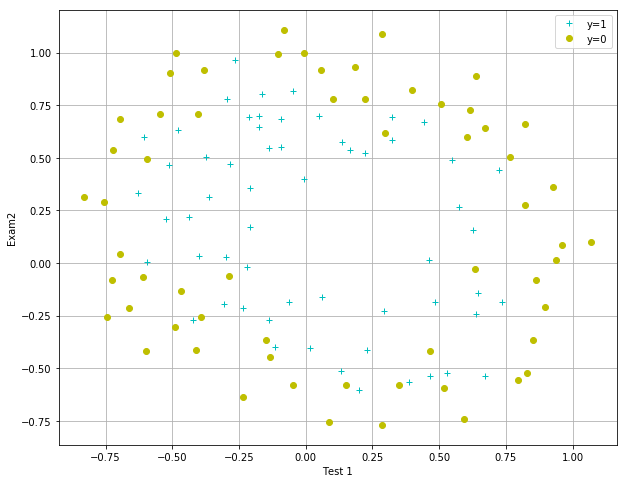

In [15]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
vis_lib.plot2Class(pos, neg, 'y=1', 'y=0', 'Test 1', 'Exam2')

In [16]:
print('Cost at initial theta (zeros) :{}.'.format(ml_lib.logLossCost(X, y, theta)))

Cost at initial theta (zeros) :[0.69314718].


In [17]:
[theta, J_history] = ml_lib.logisticRegressionGradientDescent(X, y, theta, 1, 20000);

In [18]:
print('Theta computed from gradient descent : {}, {}, {}.'.format(theta[0][0], theta[1][0], theta[2][0]))

Theta computed from gradient descent : 4.138931420104387, 1.7073916522795534, 5.427458029567139.


In [19]:
print('Cost with gradient descent :{}.'.format(ml_lib.logLossCost(X, y, theta)))

Cost with gradient descent :[0.30802155].


In [20]:
predictions = ml_lib.predictLogisticRegression(X, theta)
print('Train Accuracy with gradient descent: {}%.'.format((predictions == y).mean()*100))

Train Accuracy with gradient descent: 83.89830508474576%.
